<a href="https://colab.research.google.com/github/mehreen89/DataSets/blob/main/mehreen_NPL_Supervised_Learning_Hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning

### Supervised learning algorithms:

Presense of training data with predictors (features) and correct answer (labels).
Model uses training data to learn the relationship between features and labels.

#### Regression:

Predict a Continuous number

    Simple Linear Regression
    Multiple Linear Regression
    Polynomial Regression
    SVR
    Decision Tree Regression
    Random Forest
    
    
#### Classification:

Predict a category.

    Logistic Regression
    K-Nearest Neighbors (KNN)
    Support Vector Machine (SVM)
    Naive Bayes
    Decision Tree Classification
    Random Forest Classification


### Un-supervised learning algorithms:

Absense of output data.
Machine tries to group unsorted information based on patterns without any prior training of data.

#### Clustering:

    Grouping a set of objects in such a way that objects in the same group are more similar to each other than to those in other groups.

#### Anomaly detection:

    Identification of items, events or observations which do not conform to an expected pattern or other items in a dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Data Preprocessing

Handling Missing Data

    pandas dropna, fillna

Data Cleaning, formatting

Encoding categorical data

    pandas get_dummies
    sklearn LabelEncoder, OneHotEncoder

Splitting the data into Train and Test
    
    sklearn train_test_split

Feature Scaling:
    
    Standardization: (x - mean(x)) / std(x) sklearn StandardScaler
    Normalization: (x - min(x)) / (max(x) - min(x)) sklearn MinMaxScaler

## Classification - Supervised Learning

### Applying classification algorithms on Iris dataset

In [ ]:
df = pd.read_csv('/content/sample_data/Iris.csv')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
df['Iris-setosa'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Visualizing the dataset

In [ ]:
import matplotlib.pyplot as plt

setosa = df[df['Iris-setosa'] == "Setosa"]
#versicolor = df[df['Iris-versicolor'] == 'Versicolor']
#virginica = df[df['Iris-virginica'] == 'Virginica']


fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal.length'], setosa['petal.width'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal.length'], versicolor['petal.width'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal.length'], virginica['petal.width'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length")
ax.set_ylabel("petal width")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [ ]:
df.isnull().any()

5.1            False
3.5            False
1.4            False
0.2            False
Iris-setosa    False
dtype: bool

In [ ]:
df['Iris-setosa'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Iris-setosa, dtype: int64

#### Encode categorical features/label

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

df.head()

#df['variety'] = df['variety'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})

,5.1,3.5,1.4,0.2,Iris-setosa
0,6,9,4,1,0
1,4,11,3,1,0
2,3,10,5,1,0
3,7,15,4,1,0
4,11,18,7,3,0


In [ ]:
df['Iris-setosa'].unique()

array([0, 1, 2])

In [ ]:
df['Iris-setosa'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Using Logistic regression for multi class classification

<img src="https://image.slidesharecdn.com/linearmodelsandmulticlassclassification2-170312171304/95/linear-models-and-multiclass-classification-22-638.jpg?cb=148933888">

### Data splitting for training and testing the models

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(119, 4)
(30, 4)


### Modle Training

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

### Predictions with the trained model

In [ ]:
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

### Training and Testing Predictions

In [ ]:
train_predictions

array([0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2,
       1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0,
       2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1,
       1, 1, 0, 0, 0, 2, 1, 2, 0])

In [ ]:
test_predictions

array([2, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 2])

### Performance in Training

In [ ]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, train_predictions, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, train_predictions))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        37
           1      1.000     0.950     0.974        40
           2      0.955     1.000     0.977        42

    accuracy                          0.983       119
   macro avg      0.985     0.983     0.984       119
weighted avg      0.984     0.983     0.983       119

[[37  0  0]
 [ 0 38  2]
 [ 0  0 42]]


### Performance in Testing

In [ ]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_test, test_predictions, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_test, test_predictions))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.833     1.000     0.909        10
           2      1.000     0.750     0.857         8

    accuracy                          0.933        30
   macro avg      0.944     0.917     0.922        30
weighted avg      0.944     0.933     0.932        30

[[12  0  0]
 [ 0 10  0]
 [ 0  2  6]]


### Definitions of Accuracy measurement

In [ ]:
Specificity - TN/TN+FP
Sensitivity (Recall) - TP/(TP+FN)
Precision - TP/(TP+FP)
Accuracy = (TP+TN)/(TP+TN+FP+FN)

ROC Curve -- Specificity vs Sensitivity/Recall plots

## Un-supervised Learning

### KMeans Clustering

Partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.

    Choose number of clusters (Within center sum of squares to find the optimum number of clusters)
    Select at random k points, centroids
    Assign each data point to the centroid
    Compute the new centroid for each cluster
    Re-assign each data point to new centroid, if reassignment took place - go to step 4 else, finish

In [ ]:
# import modules
from sklearn.cluster import KMeans

# create an instance
kmeans = KMeans(n_clusters=3, random_state=0)

### K-means clustering

In [ ]:
# fit the model
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
# view the data labels after clustering
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# view the cluster centers
kmeans.cluster_centers_  #coordinate of centers

array([[16.63793103,  6.79310345, 20.70689655, 10.62068966],
       [ 7.03773585, 12.32075472,  5.01886792,  1.81132075],
       [25.31578947,  9.73684211, 33.13157895, 16.71052632]])

### Visualizing the clusters

In [ ]:
# create a array for label colors
colors = ['red', 'blue', 'green']
# assign color to each cluster
pred_colors = [colors[label] for label in kmeans.labels_]
# assign color to existing labels
actual_colors = [colors[label] for label in y]

### K-means clustering distribution

Text(0.5, 1.0, 'KMeans clusters')

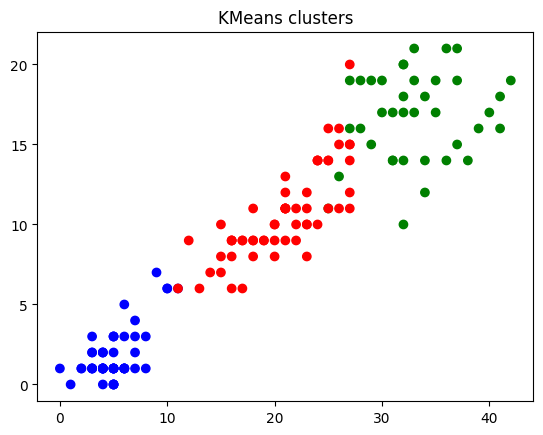

In [ ]:
# plot the KMeans clusters
plt.scatter(X[:, 2], X[:, 3], c=pred_colors)
plt.title('KMeans clusters')

### Existing distribution

Text(0.5, 1.0, 'Existing Layout')

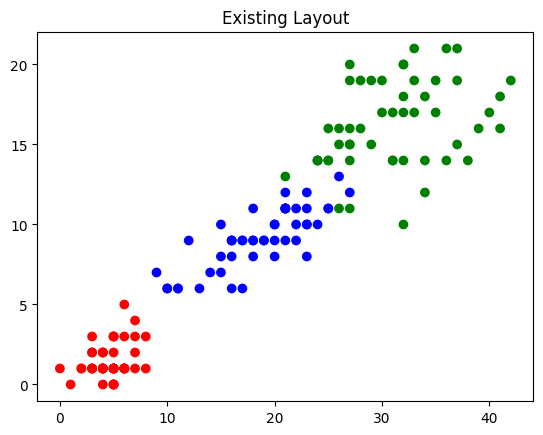

In [ ]:
plt.scatter(X[:, 2], X[:, 3], c=actual_colors)
plt.title('Existing Layout')

### Side by side visualization

Text(0.5, 1.0, 'Existing Layout')

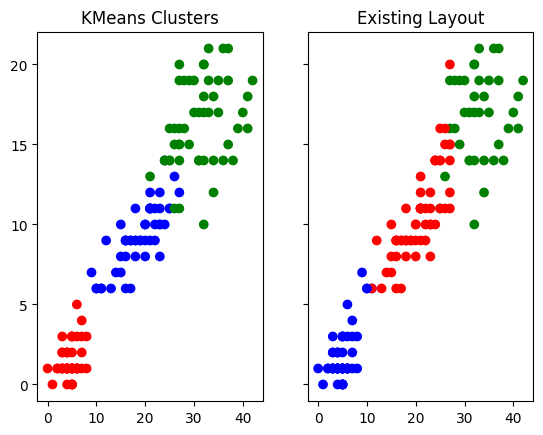

In [ ]:
# Two subplots
f, axarr = plt.subplots(1, 2, sharey=True)

axarr[0].scatter(X[:, 2], X[:, 3], c=actual_colors)
axarr[0].set_title('KMeans Clusters')

axarr[1].scatter(X[:, 2], X[:, 3], c=pred_colors)
axarr[1].set_title('Existing Layout')